In [1]:
# Import Libraries
# from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
# from tqdm.notebook import tqdm
import copy
import pandas as pd
from pandas import read_csv
# import seaborn as sns
# import cv2
# import xgboost as xgb
# from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import LogisticRegression
# from sqlalchemy import create_engine
# from sklearn.metrics import confusion_matrix, classification_report
import string
#from sklearn.model_selection import train_test_split
# from sklearn.model_selection import train_test_split, KFold
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# import torch
# import torch.nn as nn
# from torch.autograd import Variable
# import torchvision.transforms as transforms
# import torchvision.datasets as dsets
# from sklearn.decomposition import PCA,TruncatedSVD, IncrementalPCA
# from scipy.sparse import random as sparse_random
# from sklearn.random_projection import sparse_random_matrix
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.manifold import TSNE
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
file1 = './data/Fr2_dis/csi_dataQPSK.csv'#'AI/Advertising Dataset.csv'#
file2 = './data/Fr2_dis/csi_data16QAM.csv'#'AI/Advertising Dataset.csv'#
file3 = './data/Fr2_dis/csi_data64QAM.csv'#'AI/Advertising Dataset.csv'#
file4 = './data/Fr2_dis/csi_data256QAM.csv'#'AI/Advertising Dataset.csv'#

In [3]:
print(read_csv(file3,usecols=[0],header=None))

                0
0    0.000000e+00
1    4.675800e+06
2    4.742800e+01
3    1.171900e-01
4    2.000000e+00
..            ...
589  6.513800e+06
590  1.566300e+00
591  8.789100e-01
592  2.000000e+00
593  2.000000e+02

[594 rows x 1 columns]


In [4]:
(2295/51)/9

5.0

In [5]:
df1 = read_csv(file1,usecols=[0],header=None)
df2 = read_csv(file2,usecols=[0],header=None)
df3 = read_csv(file3,usecols=[0],header=None)
df4 = read_csv(file4,usecols=[0],header=None)

In [6]:
df1

,0
0,0.000000e+00
1,1.559000e+06
2,7.508100e+01
3,1.171900e-01
4,0.000000e+00
...,...
589,5.018200e+06
590,-8.272700e+00
591,8.789100e-01
592,0.000000e+00


In [7]:
data1 = np.array(df1)
data2 = np.array(df2)
data3 = np.array(df3)
data4 = np.array(df4)

In [8]:
#data2[16728:16733]   # BER, max throughput, SNR, Code_rate, Modulation
data3[0:5]

array([[  0.45908],
       [  0.     ],
       [-10.     ],
       [  0.11719],
       [  2.     ]])

In [10]:
#data_ch = data[:,0]
print(data2[16728:16733])
print(data1.shape)
print(data2.shape)

[]
(2295, 1)
(2295, 1)


In [8]:
data_ch1 = np.reshape(data1,(-1,6))
data_ch2 = np.reshape(data2,(-1,6))
data_ch3 = np.reshape(data3,(-1,6))
data_ch4 = np.reshape(data4,(-1,6))
print(data_ch3)

[[ 0.0000e+00  4.6758e+06  4.7428e+01  1.1719e-01  2.0000e+00  5.0000e+00]
 [ 0.0000e+00  4.6758e+06  4.2064e+01  1.1719e-01  2.0000e+00  1.0000e+01]
 [ 0.0000e+00  4.6758e+06  3.3608e+01  1.1719e-01  2.0000e+00  2.0000e+01]
 [ 0.0000e+00  4.6758e+06  2.3564e+01  1.1719e-01  2.0000e+00  4.0000e+01]
 [ 4.3888e-03  4.6408e+06  1.6587e+01  1.1719e-01  2.0000e+00  6.0000e+01]
 [ 8.2563e-03  4.5969e+06  2.1338e+01  1.1719e-01  2.0000e+00  8.0000e+01]
 [ 4.6454e-02  4.3602e+06  2.2883e+01  1.1719e-01  2.0000e+00  1.0000e+02]
 [ 6.7237e-02  4.2199e+06  1.6242e+01  1.1719e-01  2.0000e+00  1.2000e+02]
 [ 1.0017e-01  4.0183e+06  1.6323e+01  1.1719e-01  2.0000e+00  1.3000e+02]
 [ 2.0988e-01  3.3286e+06  6.5675e+00  1.1719e-01  2.0000e+00  1.7000e+02]
 [ 2.1495e-01  3.2146e+06  6.1161e-02  1.1719e-01  2.0000e+00  2.0000e+02]
 [ 6.2638e-03  9.2386e+06  6.0001e+01  2.3438e-01  2.0000e+00  5.0000e+00]
 [ 6.5763e-03  9.2327e+06  5.0256e+01  2.3438e-01  2.0000e+00  1.0000e+01]
 [ 6.8907e-03  9.2210e+06

In [10]:
data_ch4[:,1]            # SNR

array([       0.,        0.,        0.,        0.,        0.,   896080.,
        1597400.,  1870100.,  2688200.,  3116800.,  3116800.,  3116800.,
        5025800.,  6233600.,  6233600.,  6233600.,  6233600.,  6233600.,
        6233600.,  6233600.,  6233600.,  6233600.,  6233600.,  6233600.,
        6233600.,  6233600.,  6233600.,  6233600.,  6233600.,  6233600.,
        6233600.,  6233600.,  6233600.,  6233600.,  6233600.,  6233600.,
        6233600.,  6233600.,  6233600.,  6233600.,  6233600.,  6194600.,
        6194600.,  6194600.,  6194600.,  6194600.,  6155700.,  6155700.,
        6155700.,  6116700.,  6116700.,        0.,        0.,        0.,
              0.,        0.,        0.,        0.,        0.,   779280.,
        2415800.,  3740500.,  3740500.,  4831500.,  6234200.,  6234200.,
        6234200.,  6234200.,  6546000., 11923000., 12468000., 12468000.,
       12468000., 12468000., 12468000., 12468000., 12468000., 12468000.,
       12468000., 12468000., 12468000., 12468000., 

In [21]:
#data_ch1 = data_ch1[18:]
#data_ch2 = data_ch2[18:]
#data_ch3 = data_ch3[18:]
#data_ch4 = data_ch4[18:]

In [9]:
len(data_ch4)

99

In [14]:
#list = 120,240,300,390,490,550,620,720,820
maxthr1 = np.array([74560,150080,184320,240640,302080,338240,368960,450880,512320])

In [15]:
maxthr2 = np.array([150080,297280,368960,481600,604480,675840,737280,901440,1024320])

In [16]:
maxthr3 = np.array([225600,451200,563520,717120,921600,1024320,1126720,1352640,1515840])

In [17]:
maxthr4 = np.array([297280,594240,737280,962880,1208640,1352640,1475840,1803840,2048640])

In [12]:
inflex_arr = []
for i in range(9):
    
    inflex1 = np.concatenate((np.reshape(((data_ch1[i*51:(i+1)*51,1])),(51,1)),np.reshape(((data_ch2[i*51:(i+1)*51,1])),(51,1))),axis=1)
    inflex2 = np.concatenate((np.reshape(((data_ch3[i*51:(i+1)*51,1])),(51,1)),np.reshape(((data_ch4[i*51:(i+1)*51,1])),(51,1))),axis=1)
    #print(inflex1)
    inflex_c = np.concatenate((inflex1,inflex2),axis=1)
    inflex_arr.append(inflex_c)
    print(inflex_arr)

[array([[ 769780.,       0.,       0.,       0.],
       [1218000.,       0.,       0.,       0.],
       [1559000.,  136250.,       0.,       0.],
       [1559000.,  798020.,       0.,       0.],
       [1559000.,  953740.,  876720.,       0.],
       [1559000., 1557100., 1402800.,  896080.],
       [1559000., 1557100., 1490400., 1597400.],
       [1559000., 1985300., 2308700., 1870100.],
       [1559000., 3114200., 2337900., 2688200.],
       [1559000., 3114200., 2337900., 3116800.],
       [1559000., 3114200., 4266700., 3116800.],
       [1559000., 3114200., 4675800., 3116800.],
       [1559000., 3114200., 4675800., 5025800.],
       [1559000., 3114200., 4675800., 6233600.],
       [1559000., 3114200., 4675800., 6233600.],
       [1559000., 3114200., 4675800., 6233600.],
       [1559000., 3114200., 4675800., 6233600.],
       [1559000., 3114200., 4675800., 6233600.],
       [1559000., 3114200., 4675800., 6233600.],
       [1559000., 3114200., 4675800., 6233600.],
       [1559000., 3

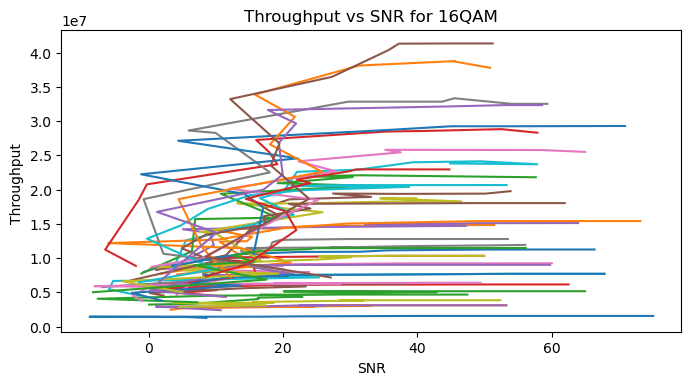

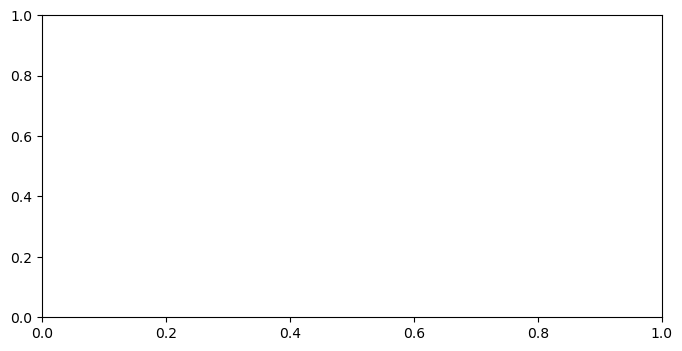

In [12]:
fig,ax = plt.subplots(figsize=(8,4),dpi=100)
fig2,ax2 = plt.subplots(figsize=(8,4),dpi=100)
#inflex_arr = []
arr_pl1 = []
arr_pl2 = []
for i in range(9):
    
    #ax.plot(data_ch[i*41:(i+1)*41,16730],(data_ch[i*41:(i+1)*41,16729]/1e6)-10*(data_ch[i*41:(i+1)*41,16729]/1e6)*(data_ch[i*41:(i+1)*41,16728]),label=str(i))
    ax.plot(data_ch1[i*11:(i+1)*11,2],(data_ch1[i*11:(i+1)*11,1]),label='1'+str(i))
    ax.plot(data_ch2[i*11:(i+1)*11,2],(data_ch2[i*11:(i+1)*11,1]),label="{:.4f}".format(data_ch2[i*11,3]))
    ax.plot(data_ch3[i*11:(i+1)*11,2],(data_ch3[i*11:(i+1)*11,1]),label='3'+str(i))
    ax.plot(data_ch4[i*11:(i+1)*11,2],(data_ch4[i*11:(i+1)*11,1]),label='4'+str(i))
    #inflex = np.array([(data_ch1[i*41:(i+1)*41,1])*maxthr1[i],(data_ch2[i*41:(i+1)*41,1])*maxthr2[i],(data_ch3[i*41:(i+1)*41,1])*maxthr3[i],(data_ch4[i*41:(i+1)*41,1])*maxthr4[i]])
    #inflex_c = np.reshape(inflex,(-1,4))
    #inflex_arr.append(inflex_c)
    #arr_pl1.append(data_ch2[i*51:(i)*51+36,2])
    #arr_pl2.append((data_ch2[i*51:(i)*51+36,1])/20000)
    #ax.legend(title="Code rates",loc=2)
    ax.set_title('Throughput vs SNR for 16QAM')
    ax.set_xlabel('SNR')
    ax.set_ylabel('Throughput ')
    
plt.show()

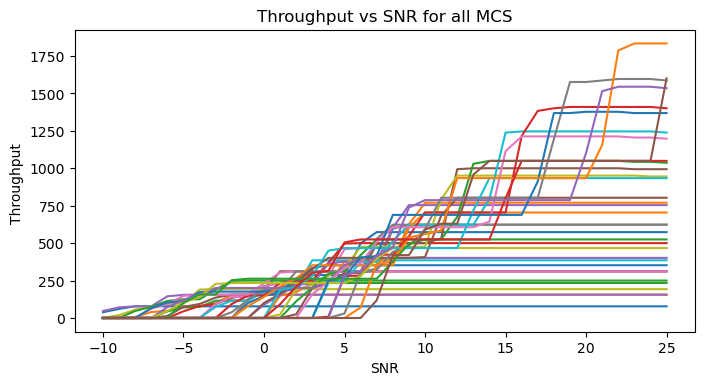

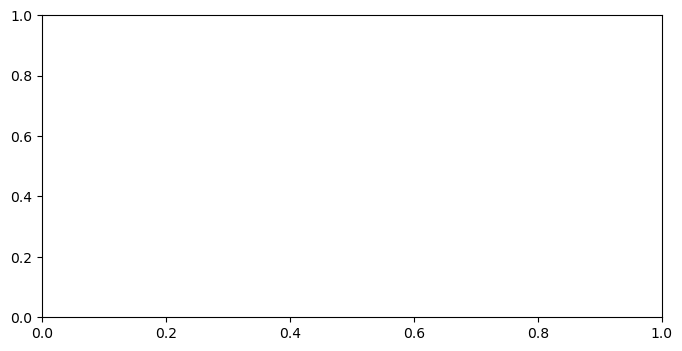

In [17]:
fig,ax = plt.subplots(figsize=(8,4),dpi=100)
fig2,ax2 = plt.subplots(figsize=(8,4),dpi=100)
#inflex_arr = []
for i in range(9):
    
    #ax.plot(data_ch[i*41:(i+1)*41,16730],(data_ch[i*41:(i+1)*41,16729]/1e6)-10*(data_ch[i*41:(i+1)*41,16729]/1e6)*(data_ch[i*41:(i+1)*41,16728]),label=str(i))
    ax.plot(data_ch1[i*51:(i)*51+36,2],(data_ch1[i*51:(i)*51+36,1])/20000,label="QPSK "+"{:.4f}".format(data_ch1[i*51,3]))
    ax.plot(data_ch2[i*51:(i)*51+36,2],(data_ch2[i*51:(i)*51+36,1])/20000,label="16QAM "+"{:.4f}".format(data_ch2[i*51,3]))
    ax.plot(data_ch3[i*51:(i)*51+36,2],(data_ch3[i*51:(i)*51+36,1])/20000,label="64QAM "+"{:.4f}".format(data_ch3[i*51,3]))
    ax.plot(data_ch4[i*51:(i)*51+36,2],(data_ch4[i*51:(i)*51+36,1])/20000,label="256QAM "+"{:.4f}".format(data_ch4[i*51,3]))
    #inflex = np.array([(data_ch1[i*41:(i+1)*41,1])*maxthr1[i],(data_ch2[i*41:(i+1)*41,1])*maxthr2[i],(data_ch3[i*41:(i+1)*41,1])*maxthr3[i],(data_ch4[i*41:(i+1)*41,1])*maxthr4[i]])
    #inflex_c = np.reshape(inflex,(-1,4))
    #inflex_arr.append(inflex_c)
    #ax.legend(title="Code rates",loc=2)
    ax.set_title('Throughput vs SNR for all MCS')
    ax.set_xlabel('SNR')
    ax.set_ylabel('Throughput ')
    
plt.show()

In [18]:
len(inflex_arr)

9

In [19]:
inflex_arr = np.array(inflex_arr)

In [20]:
inflex_arr.shape

(9, 51, 4)

In [21]:
inflex_arr[1]

array([[  934270.,        0.,        0.,        0.],
       [ 1420900.,        0.,        0.,        0.],
       [ 1557100.,        0.,        0.,        0.],
       [ 1557100.,        0.,        0.,        0.],
       [ 2900100.,   272720.,        0.,        0.],
       [ 3094800.,  1480500.,        0.,        0.],
       [ 3114200.,  1870100.,        0.,        0.],
       [ 3114200.,  2727200.,  1871100.,        0.],
       [ 3114200.,  3116800.,  2806700.,   779280.],
       [ 3114200.,  3116800.,  2806700.,  2415800.],
       [ 3114200.,  3623300.,  4210000.,  3740500.],
       [ 3114200.,  6233600.,  4677800.,  3740500.],
       [ 3114200.,  6233600.,  4677800.,  4831500.],
       [ 3114200.,  6233600.,  4677800.,  6234200.],
       [ 3114200.,  6233600.,  5613300.,  6234200.],
       [ 3114200.,  6233600.,  9180100.,  6234200.],
       [ 3114200.,  6233600.,  9355500.,  6234200.],
       [ 3114200.,  6233600.,  9355500.,  6546000.],
       [ 3114200.,  6233600.,  9355500., 11923

In [22]:
max_inflex = []
max_val = 0
for i in range(36):
    max_val = 0
    for j in range(9):
        for k in range(4):
            if(inflex_arr[j][i][k]>=max_val):
                max_val = inflex_arr[j][i][k]
    max_inflex.append(max_val)
    max_val = 0
print(max_inflex)
max_inflex = np.array(max_inflex)

[934270.0, 1420900.0, 1559000.0, 1559000.0, 2900100.0, 3094800.0, 3803400.0, 4554000.0, 5049400.0, 5246100.0, 5246100.0, 6233600.0, 6233600.0, 7706900.0, 8993000.0, 10101000.0, 10494000.0, 11470000.0, 13774000.0, 15080000.0, 15742000.0, 16065000.0, 19878000.0, 20595000.0, 20990000.0, 24768000.0, 24924000.0, 27665000.0, 28017000.0, 31527000.0, 31527000.0, 31728000.0, 35742000.0, 36676000.0, 36676000.0, 36676000.0]


In [23]:
print(max_inflex)

[  934270.  1420900.  1559000.  1559000.  2900100.  3094800.  3803400.
  4554000.  5049400.  5246100.  5246100.  6233600.  6233600.  7706900.
  8993000. 10101000. 10494000. 11470000. 13774000. 15080000. 15742000.
 16065000. 19878000. 20595000. 20990000. 24768000. 24924000. 27665000.
 28017000. 31527000. 31527000. 31728000. 35742000. 36676000. 36676000.
 36676000.]


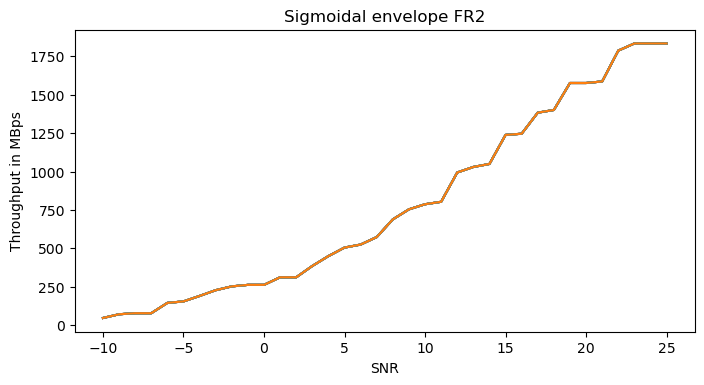

In [29]:
fig,ax = plt.subplots(figsize=(8,4),dpi=100)
for i in range(12):
    
    ax.plot(data_ch1[0*36:(1)*36,2],max_inflex/20000,label=str(i))
    ax.set_title('Sigmoidal envelope FR2')
    ax.set_xlabel('SNR')
    ax.set_ylabel('Throughput in MBps')
    
plt.show()

In [45]:
scaler = MinMaxScaler()
data_feat = np.float64(data_ch)
data_rescaled = np.float64(scaler.fit_transform(data_feat))
pca = IncrementalPCA(n_components=10,batch_size=100)

In [46]:
#test_rescaled = scaler.fit_transform(X_test)

In [48]:
data_feat[:,16729]

array([ 297280.,  297280.,  594240.,  594240.,  962880.,  962880.,
       1208600., 1208600., 1475800., 1475800., 1803800., 1803800.,
       1926700., 1926700., 2171800., 2171800., 2418200., 2418200.,
        297280.,  297280.,  297280.,  297280.,  297280.,  297280.,
        297280.,  297280.,  297280.,  297280.,  297280.,  297280.,
        297280.,  297280.,  297280.,  297280.,  297280.,  297280.,
        297280.,  297280.,  297280.,  297280.,  297280.,  297280.,
        297280.,  297280.,  297280.,  297280.,  297280.,  297280.,
        297280.,  297280.,  297280.,  297280.,  297280.,  297280.,
        297280.,  297280.,  297280.,  297280.,  297280.,  594240.,
        594240.,  594240.,  594240.,  594240.,  594240.,  594240.,
        594240.,  594240.,  594240.,  594240.,  594240.,  594240.,
        594240.,  594240.,  594240.,  594240.,  594240.,  594240.,
        594240.,  594240.,  594240.,  594240.,  594240.,  594240.,
        594240.,  594240.,  594240.,  594240.,  594240.,  5942

In [ ]:
svd = TruncatedSVD(n_components=50, n_iter=20, random_state=42)

In [ ]:
svd.fit(data_rescaled)

In [ ]:
print(svd.explained_variance_ratio_)
print(svd.explained_variance_ratio_.sum())
print(svd.singular_values_)

In [57]:
pca = IncrementalPCA(n_components=15,batch_size=100)

In [58]:
pca.fit(data_rescaled)

IncrementalPCA(batch_size=100, copy=True, n_components=15, whiten=False)

In [59]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())
print(pca.singular_values_)

[9.92503810e-01 1.17609761e-03 9.82489831e-04 8.02301993e-04
 6.73875204e-04 5.99077033e-04 5.82055212e-04 4.72772635e-04
 4.39374168e-04 2.84146128e-04 2.28663225e-04 1.94300673e-04
 1.37792884e-04 1.21927656e-04 9.42200764e-05]
0.9992929038638346
[479.28670696  16.49874749  15.07972164  13.62693638  12.4887517
  11.77526333  11.60677015  10.4605726   10.08431847   8.10961363
   7.27490716   6.70604471   5.64732377   5.31227325   4.66982944]


In [112]:
data_trans = pca.transform(data_rescaled)

In [115]:
test_trans = pca.transform(test_rescaled)

In [116]:
data_trans.shape

(10000, 100)

In [64]:
X_train = data_rescaled[:,:16731]
print(X_train.shape)

(387, 16731)


In [87]:
y_train = data_rescaled[:,16731:]
print(y_train.shape)

(387, 2)


In [88]:
pca = IncrementalPCA(n_components=1)

In [89]:
pca.fit(y_train)

IncrementalPCA(batch_size=None, copy=True, n_components=1, whiten=False)

In [90]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())
print(pca.singular_values_)

[1.]
1.0000000000000002
[6.28359993]


In [91]:
y_train = pca.transform(y_train)
print(y_train)

[[-0.53463923]
 [-0.53463923]
 [-0.39346007]
 [-0.39346007]
 [-0.21699515]
 [-0.21699515]
 [-0.09934384]
 [-0.09934384]
 [ 0.03006538]
 [ 0.03006538]
 [ 0.17124454]
 [ 0.17124454]
 [ 0.23005815]
 [ 0.23005815]
 [ 0.34770946]
 [ 0.34770946]
 [ 0.46536077]
 [ 0.46536077]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.39346007]
 [-0.39346007]
 [-0.39346007]
 [-0.39346007]
 [-0.39346007]
 [-0.39346007]
 [-0.39346007]
 [-0.39346

In [92]:
y_train = np.round(10*y_train)
print(y_train)

[[-5.]
 [-5.]
 [-4.]
 [-4.]
 [-2.]
 [-2.]
 [-1.]
 [-1.]
 [ 0.]
 [ 0.]
 [ 2.]
 [ 2.]
 [ 2.]
 [ 2.]
 [ 3.]
 [ 3.]
 [ 5.]
 [ 5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-1.]
 [-1.]

In [93]:
y_train = y_train+5
print(y_train)

[[ 0.]
 [ 0.]
 [ 1.]
 [ 1.]
 [ 3.]
 [ 3.]
 [ 4.]
 [ 4.]
 [ 5.]
 [ 5.]
 [ 7.]
 [ 7.]
 [ 7.]
 [ 7.]
 [ 8.]
 [ 8.]
 [10.]
 [10.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 4.]
 [ 4.]

In [102]:
y_train.shape

(387, 1)

In [94]:
lda = LinearDiscriminantAnalysis(n_components=11)
lda.fit(X_train, y_train)

/home/shubham/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/shubham/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(16731, 8 - 1) = 7 components.
  ChangedBehaviorWarning)
/home/shubham/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


LinearDiscriminantAnalysis(n_components=11, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

(387, 7)


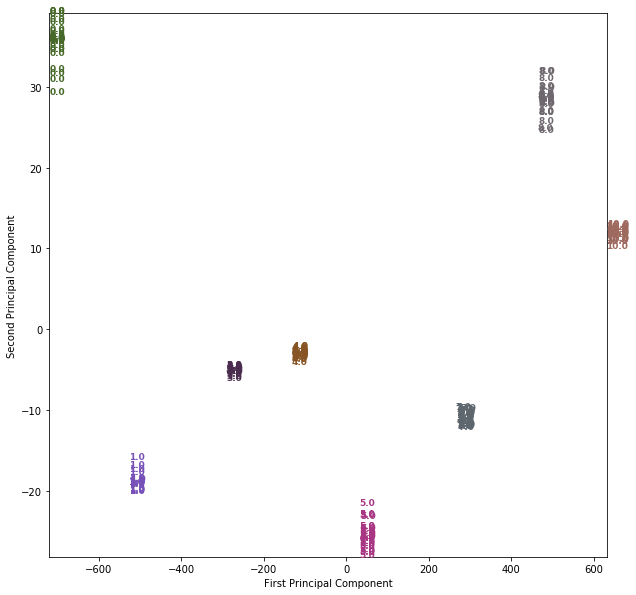

In [113]:
trainX_lda = lda.transform(X_train)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#3E655E","#5E666E","#6E676E","#7E685E","#9E695E"]
plt.figure(figsize=(10, 10))
plt.xlim(trainX_lda[:, 0].min(), trainX_lda[:, 0].max())
plt.ylim(trainX_lda[:, 1].min(), trainX_lda[:, 1].max())
print(trainX_lda.shape)
for i in range(len(trainX_lda)):
    # actually plot the digits as text instead of using scatter
    plt.text(trainX_lda[i, 0], trainX_lda[i, 1], str(y_train[i,0]),
             color=colors[int(y_train[i,0])], fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.show(block=True)

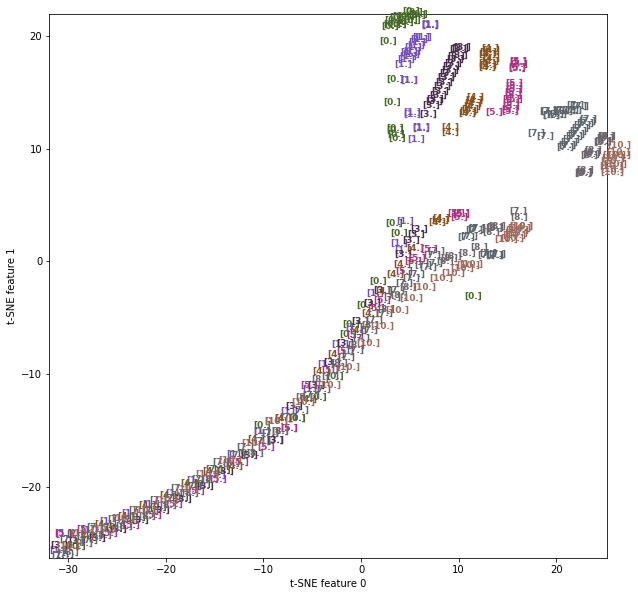

In [114]:
tsne = TSNE(random_state=21)
# use fit_transform instead of fit, as TSNE has no transform method
trainX_tsne = tsne.fit_transform(X_train)
plt.figure(figsize=(10, 10))
plt.xlim(trainX_tsne[:, 0].min(), trainX_tsne[:, 0].max())
plt.ylim(trainX_tsne[:, 1].min(), trainX_tsne[:, 1].max())
for i in range(len(trainX_tsne)):
    # actually plot the digits as text instead of using scatter
    plt.text(trainX_tsne[i, 0], trainX_tsne[i, 1], str(y_train[i]),
            color=colors[int(y_train[i])], fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")
plt.show(block=True)

In [115]:
trainX_tsne.shape

(387, 2)

In [98]:
testX_tsne.shape

(1000, 2)

In [39]:
X_train = np.concatenate((X_train,trainX_tsne),axis=1)

In [43]:
X_test = np.concatenate((X_test,testX_tsne),axis=1)

In [ ]:
l = np.unique(data_new[:,7])
print(l.shape)

In [ ]:
corr_data = pd.DataFrame({data_fn})

In [ ]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
print(data_fn[0])
print(data_new[0][335:365])

In [ ]:
data_new.shape

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data_new[:,1:], data_new[:,0], test_size=0.1, random_state=42)

In [10]:
X_train.shape

(9000, 362)

In [11]:
y_test.shape

(1000,)

In [49]:
xgb_model = xgb.XGBClassifier()#(xgb_model='best_grid.pkl')#xgb.train(loaded_params,xgb_model=)#

parameters = {'nthread':[3], #when use hyperthread, xgboost may become slower
              'objective':['multi:softmax'],
              'learning_rate': [0.05], #so called `eta` value
              'max_depth': [15],
              'min_child_weight': [15],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [1.0],
              'n_estimators': [10], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [1337]}


clf = RandomizedSearchCV(xgb_model, parameters, n_jobs=5, 
                   cv=10, 
                   scoring='accuracy',
                   verbose=2, refit=True)
X_tr = X_train[:,363:]
X_ts = X_test[:,363:]

clf.fit(X_tr, y_train)

y_pred = clf.predict(X_ts)

print(confusion_matrix(y_test, y_pred))

#xgb_model.fit(X_train, y_train)
'''
param_grid = {  }

gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=2
    )



'''
#clf.fit(X_train, y_train,eval_set=[(X_train, y_train), (X_test, y_test)],eval_metric='logloss',verbose=True)

#evals_result = clf.evals_result()

/home/shubham/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=5)]: Done   7 out of  10 | elapsed:  1.1min remaining:   28.4s
[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed:  1.1min finished


[[121 125  25   0   0]
 [ 58 346  63   0   0]
 [ 24 138  60   0   0]
 [  3  11  14   0   0]
 [  2   6   4   0   0]]


'\nparam_grid = {  }\n\ngs = GridSearchCV(\n        estimator=model,\n        param_grid=param_grid, \n        cv=cv, \n        n_jobs=-1, \n        scoring=scoring_fit,\n        verbose=2\n    )\n\n\n\n'

In [50]:
(y_pred==y_test).sum()/len(y_test)

0.527

In [ ]:
y_pred.shape

In [ ]:
from sklearn.externals import joblib

In [ ]:

joblib.dump(clf.best_estimator_, 'part_grid.pkl')
clf.save_model('best_model.model')

In [ ]:
loaded_params = joblib.load('best_grid.pkl')

In [ ]:
y_pred2 = loaded_params.predict(X_test)

In [ ]:
(y_pred2==y_pred).shape

In [ ]:
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dvalid = xgb.DMatrix(data=X_test, label=y_test)

In [ ]:

#params=loaded_params,
params = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['multi:softmax'],
              'learning_rate': [0.05], #so called `eta` value
              #'max_depth': [6],
              #'min_child_weight': [11],
              #'silent': [1],
              #'subsample': [0.8],
              #'colsample_bytree': [0.7],
              'n_estimators': [10] #number of trees, change it to 1000 for better results
              #'missing':[-999],
              'seed': [1337]
             }

mod = xgb.train(params= params,dtrain=dtrain,num_boost_round=10000,early_stopping_rounds=100,evals=[(dvalid,'valid'), (dtrain,'train')])

In [ ]:
for l in range(10):
    data_new = []
    data_fn = []
    for k in range(10000):
        b = data[10000*l+k][1]
        for i in b.splitlines():
            m = 0
            a = []
            c = []
            for j in i.split('\t'):
                #print(m)
                if(m!=1 and m!=2):
                    a.append(float(j))
                else:
                    c.append(str(j))
                m += 1
        #print(a)
        a = np.array(a)
        c = np.array(c)
        #print(type(a[0][6]))
        #print(a)
        data_fn.append(c)
        data_new.append(a)
        
    data_fn = np.array(data_fn)
    data_new = np.array(data_new)
    
    X_train, X_test, y_train, y_test = train_test_split(data_new[:,1:], data_new[:,0], test_size=0.1, random_state=42)
    xg_train_1 = xgb.DMatrix(X_train, label=y_train)
    xg_test = xgb.DMatrix(X_test, label=y_test)
    
    params = {'objective': 'multi:softmax', 'verbose': False, 'num_class' : 5, 'num_parallel_tree' : 10}

    if i==0:
        model_1 = xgb.train(params, xg_train_1, 30)
        model_1.save_model('model_1.model')
    else:
        model_2_v2 = xgb.train(params, xg_train_2, 30, xgb_model='model_1.model')
        model_2_v2.save_model('model_1.model')
        print(np.sum(model_2_v2.predict(xg_test)== y_test)/len(y_test))

In [ ]:
xg_train_1 = xgb.DMatrix(X_train, label=y_train)
xg_train_2 = xgb.DMatrix(X_train, label=y_train)
xg_test = xgb.DMatrix(X_test, label=y_test)

In [ ]:
params = {'objective': 'multi:softmax', 'verbose': False, 'num_class' : 5, 'n_estimators' : 1}

model_1 = xgb.train(params, xg_train_1, 5)

In [ ]:
model_1.save_model('model_1.model')

In [ ]:
model_2_v1 = xgb.train(params, xg_train_2, 10)
model_2_v2 = xgb.train(params, xg_train_2, 10, xgb_model='model_1.model')

In [ ]:
print(np.sum(model_1.predict(xg_test)== y_test))     # benchmark
print(np.sum(model_2_v1.predict(xg_test)== y_test))  # "before"
print(np.sum(model_2_v2.predict(xg_test)== y_test))

In [ ]:
xgb_scikit = xgb.XGBClassifier(verbose=0,
                               objective='multi:softmax',
                               n_jobs=4)

In [ ]:
xgb_scikit.fit(X_train,y_train)

In [ ]:
xgb.train(params=xgb_scikit.get_xgb_params, dtrain=dtrain, xgb_model=xgb_scikit)

In [ ]:
reg = LogisticRegression(random_state=0).fit(X_train, y_train)

In [ ]:
print(reg.score(X_train, y_train))

In [ ]:
print(reg.coef_)
print(reg.intercept_)

In [ ]:
test_pred = reg.predict(X_test)
print(test_pred)
print(y_test)

In [ ]:
test_loss = np.sum(np.square(y_test-test_pred))
test_loss = test_loss/250
print(test_loss)

In [12]:
batch_size = 100
train_loader = torch.utils.data.DataLoader(dataset = X_train,
                                          batch_size = batch_size,
                                          shuffle = False)

test_loader = torch.utils.data.DataLoader(dataset = X_test,
                                          batch_size = 1,
                                          shuffle = False)

In [4]:
class LogisticRegressionModel(nn.Module):
    def __init__(self):
        super(LogisticRegressionModel,self).__init__()
        self.lin1 = nn.Linear(101,300)
        self.lin2 = nn.Linear(300,3000)
        self.lin3 = nn.Linear(3000,10000)
        self.lin4 = nn.Linear(10000,3000)
        self.lin5 = nn.Linear(3000,300)
        self.lin6 = nn.Linear(300,5)
        self.act1 = nn.ReLU()
        self.act2 = nn.Sigmoid()
        self.act3 = nn.Tanh()
        #self.sof = nn.Softmax()
        
    def forward(self,x):
        #batch, data = x
        out1 = self.lin1(x)
        out = self.act1(out1)
        out2 = self.lin2(out)
        out = self.act1(out2)
        out = self.lin3(out)
        out = self.act1(out)
        out = self.lin4(out)
        out = self.act1(out)
        out = out + out2
        out = self.lin5(out)
        out = self.act1(out)
        out = self.lin6(out)
        out = self.act2(out)
        return out

In [22]:
device = torch.device('cuda')
model = (LogisticRegressionModel().float()).to(device)

In [6]:
criterion = nn.functional.cross_entropy
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3, weight_decay=1e-5)

In [7]:
def train(train_loader):
    model.train()

    loss_all = 0
    i = 0
    y_label = np.reshape(y_train.astype(np.int32),(-1))
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        output = model(data)
        #print(output.shape)
        label = torch.LongTensor(y_label[i*1000:(i+1)*1000]).to(device)
        #print(label.shape)
        
        #out_prob = nn.functional.softmax(output,dim=1)
        #print(out_prob.shape)
        #max_prob, pred = torch.max(out_prob,dim=1)
        #print(pred.shape)
        #pred = torch.reshape(pred, (-1, 1))
        loss = criterion(output, label)
        #print(output)
        loss.backward()
        optimizer.step()
        loss_all += loss
        
    return loss_all

In [8]:
def evaluate(train_loader):
    model.eval()

    predictions = []
    labels = []

    with torch.no_grad():
        for data in train_loader:
            data = data.to(device)
            pred = model(data)
            
            pred = pred.detach().cpu().numpy()
            #ed2 = ed2.detach().cpu().numpy()
            label = data.y.detach().cpu().numpy()
            pred = np.mean(pred,0)
            predictions.append(pred)
            labels.append(label)

    predictions = np.hstack(predictions)
    
    #print("labels")
    labels = np.hstack(labels)
    #print(labels)
    #predictions = np.reshape(predictions,labels.shape)
    #print(predictions)
    return mse(labels, predictions)

In [23]:
#del model, optimizer, loss, outputs
torch.cuda.empty_cache()

In [19]:

for epoch in range(2):
    loss = train(train_loader)
    
    #val_acc = evaluate(val_loader)    
    #test_acc = evaluate(test_loader)
    
    
    if epoch%1==0:
        #learning_rate *= 0.9
        #optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
        print('Epoch: {:03d}, Loss: {:.5f}'.
          format(epoch, loss))
        #torch.save(model.state_dict(),'m_tsne.pkl')
    #torch.cuda.empty_cache()
    #ep.append(epoch)
    #l.append(loss)
    #plt.clf()
    #plt.plot(ep,l, label = "line 1")
    #plt.show()
    #train_acc = evaluate(train_loader)     
    
    #if epoch%10==0:
    #        print('epoch {}, loss {}'.format(epoch, loss.data))
    #    if loss<0.00001:
    #        torch.save(model.state_dict(),'/home/shubham/m.pkl')

RuntimeError: Expected object of scalar type Float but got scalar type Double for argument #2 'mat1' in call to _th_addmm

In [158]:
labels = []
for data in test_loader:
    l = model(data.to(device))
    out_prob = nn.functional.softmax(l,dim=1)
    #print(out_prob.shape)
    max_prob, pred = torch.max(out_prob,dim=1)
    #print(pred.shape)
    labels.append((pred.cpu()).numpy())

In [159]:
labels = np.array(labels)

In [160]:
l = np.unique(labels)

In [161]:
print(labels)
print(l)

[[0]
 [0]
 [2]
 [2]
 [2]
 [0]
 [0]
 [0]
 [0]
 [2]
 [2]
 [0]
 [2]
 [0]
 [2]
 [0]
 [0]
 [0]
 [0]
 [2]
 [2]
 [0]
 [0]
 [2]
 [2]
 [2]
 [2]
 [0]
 [0]
 [0]
 [2]
 [2]
 [2]
 [0]
 [0]
 [2]
 [0]
 [0]
 [0]
 [2]
 [0]
 [0]
 [2]
 [0]
 [2]
 [0]
 [0]
 [2]
 [2]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [2]
 [2]
 [0]
 [2]
 [2]
 [0]
 [0]
 [2]
 [0]
 [2]
 [0]
 [0]
 [0]
 [2]
 [0]
 [2]
 [0]
 [0]
 [2]
 [0]
 [0]
 [2]
 [2]
 [2]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [2]
 [2]
 [2]
 [2]
 [0]
 [2]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [2]
 [0]
 [2]
 [0]
 [0]
 [0]
 [0]
 [0]
 [2]
 [0]
 [2]
 [2]
 [0]
 [2]
 [0]
 [0]
 [2]
 [2]
 [0]
 [0]
 [0]
 [2]
 [2]
 [2]
 [2]
 [0]
 [2]
 [0]
 [2]
 [2]
 [0]
 [0]
 [0]
 [2]
 [2]
 [0]
 [2]
 [2]
 [0]
 [2]
 [2]
 [0]
 [2]
 [0]
 [2]
 [0]
 [0]
 [0]
 [0]
 [2]
 [0]
 [0]
 [0]
 [2]
 [0]
 [0]
 [2]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [2]
 [0]
 [0]
 [0]
 [2]
 [2]
 [0]
 [0]
 [2]
 [0]
 [0]
 [2]
 [0]
 [0]
 [2]
 [2]
 [2]
 [2]
 [0]
 [0]
 [0]
 [0]
 [0]
 [2]


In [162]:
acc = (y_test==labels[:][0])

In [163]:
accuracy = acc.sum()/len(acc)
print(accuracy)

0.271


In [ ]:
pca = IncrementalPCA(n_components=100,batch_size=1000)
batch_size = 100

for x in df:
    print(x)
    data_new = []
    data_fn = []
    data = np.array(x)
    for k in range(10000):
        b = data[k][1]
        for i in b.splitlines():
            m = 0
            a = []
            c = []
            for j in i.split('\t'):
                #print(m)
                if(m!=1 and m!=2):
                    a.append(np.float32(j))
                else:
                    c.append(str(j))
                m += 1
        #print(a)
        a = np.array(a,dtype=np.float32)
        c = np.array(c)
        #print(type(a[0][6]))
        #print(a)
        data_fn.append(c)
        data_new.append(a)
        
    data_fn = np.array(data_fn)
    data_new = np.array(data_new,dtype=np.float32)
    
    X_train, X_test, y_train, y_test = train_test_split(data_new[:,1:], data_new[:,0], test_size=0.1, random_state=42)
    
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    pca.fit(X_train)
    data_train = pca.transform(X_train)
    data_test = pca.transform(X_test)
    data_train = np.asarray(data_train,np.float32)
    data_test = np.asarray(data_test,np.float32)
    
    train_loader = torch.utils.data.DataLoader(dataset = data_train,
                                              batch_size = batch_size,
                                              shuffle = False)

    test_loader = torch.utils.data.DataLoader(dataset = data_test,
                                              batch_size = 1,
                                              shuffle = False)
    
    torch.cuda.empty_cache()
    
    
    
    for epoch in range(30):
        loss = train(train_loader)

        #val_acc = evaluate(val_loader)    
        #test_acc = evaluate(test_loader)


        if epoch%1==0:
            #learning_rate *= 0.9
            #optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
            print('Epoch: {:03d}, Loss: {:.5f}'.
              format(epoch, loss))
            torch.save(model.state_dict(),'m_pca_dl.pkl')
        
    labels = []
    for data_t in test_loader:
        l = model(data_t.to(device))
        out_prob = nn.functional.softmax(l,dim=1)
        #print(out_prob.shape)
        max_prob, pred = torch.max(out_prob,dim=1)
        #print(pred.shape)
        labels.append((pred.cpu()).numpy())
    
    labels = np.array(labels)
    acc = (y_test==labels[:][0])
    accuracy = acc.sum()/len(acc)
    print(accuracy)
    
        

        index                                                  0
0           1  0\te791ac64-71be-11ea-bd9b-a3cc40581063\tf0931...
1           2  1\td82bb79f-71be-11ea-bd9b-3b9845418535\t92019...
2           3  0\td4d7ab5a-71be-11ea-bd9b-9165b2d9ddb1\tfba32...
3           4  1\tc7759c19-71be-11ea-bd9b-e73978b2c4cd\t57b07...
4           5  0\te282343f-71be-11ea-bd9b-dbf702df66ed\t935a9...
...       ...                                                ...
99995   99996  1\tcd7541ad-71be-11ea-bd9b-8500f8c9f638\t25180...
99996   99997  0\tdfc0f140-71be-11ea-bd9b-45e74fc616b3\t924d1...
99997   99998  1\te9762456-71be-11ea-bd9b-bf2346f28ea7\t8d251...
99998   99999  0\tec537a35-71be-11ea-bd9b-3735fead3324\t948ea...
99999  100000  1\te7422d44-71be-11ea-bd9b-719de7d8e7d3\t41d52...

[100000 rows x 2 columns]
Epoch: 000, Loss: 120.41720
Epoch: 001, Loss: 120.41618
Epoch: 002, Loss: 120.41619
Epoch: 003, Loss: 120.41605
Epoch: 004, Loss: 120.41404
Epoch: 005, Loss: 119.96582
Epoch: 006, Loss: 119.796

In [173]:
labels = []
for data_t in test_loader:
        l = model(data_t.to(device))
        out_prob = nn.functional.softmax(l,dim=1)
        #print(out_prob.shape)
        max_prob, pred = torch.max(out_prob,dim=1)
        #print(pred.shape)
        labels.append((pred.cpu()).numpy())

In [175]:
l = np.unique(labels)
print(l)

[1 2]


In [18]:
pca = IncrementalPCA(n_components=100,batch_size=1000)
batch_size = 1000
loop_i = 0

#model.load_state_dict(torch.load('m_pca_dl.pkl'))
#model.eval()

for x in df:
    print(x)
    data_new = []
    data_fn = []
    data = np.array(x)
    for k in range(len(data)):
        b = data[k][1]
        for i in b.splitlines():
            m = 0
            a = []
            c = []
            for j in i.split('\t'):
                #print(m)
                if(m!=1 and m!=2):
                    a.append(np.float32(j))
                else:
                    c.append(str(j))
                m += 1
        #print(a)
        a = np.array(a,dtype=np.float32)
        c = np.array(c)
        #print(type(a[0][6]))
        #print(a)
        data_fn.append(c)
        data_new.append(a)
        
    data_fn = np.array(data_fn)
    data_new = np.array(data_new,dtype=np.float32)
    
    X_train, X_test, y_train, y_test = train_test_split(data_new[:,1:], data_new[:,0], test_size=0.1, random_state=42)
    
    
    '''
    laskmd
    '''
    xg_train_1 = xgb.DMatrix(X_train, label=y_train)
    xg_test = xgb.DMatrix(X_test, label=y_test)
    
    params = {'objective': 'multi:softmax', 'verbose': False, 'num_class' : 5, 'num_parallel_tree' : 15, 'learning_rate': 0.05, #so called `eta` value
              'max_depth': 15,
              'min_child_weight': 15,
              'silent': 1,
              'subsample': 0.7,
              'colsample_bytree': 1.0,
              'n_estimators': 15,
               'nthread' : 3}

    if loop_i==0:
        model_2_v2 = xgb.train(params, xg_train_1, 10, xgb_model='model_1.model')
        model_2_v2.save_model('xgb_dl.model')
        labels_test = model_2_v2.predict(xg_test)
        labels_train = model_2_v2.predict(xg_train_1)
        print(np.sum(labels_test == y_test)/len(y_test))
        print(loop_i)
    else:
        model_2_v2 = xgb.train(params, xg_train_1, 10, xgb_model='xgb_dl.model')
        model_2_v2.save_model('xgb_dl.model')
        labels_test = model_2_v2.predict(xg_test)
        labels_train = model_2_v2.predict(xg_train_1)
        print(np.sum(labels_test == y_test)/len(y_test))
        print(loop_i)
        
    
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    pca.fit(X_train)
    data_train = pca.transform(X_train)
    data_test = pca.transform(X_test)
    data_train = np.asarray(data_train,np.float32)
    data_test = np.asarray(data_test,np.float32)
    
    labels_test = np.reshape((100*labels_test),(-1,1))
    labels_train = np.reshape((100*labels_train),(-1,1))
    print(labels_train)
    X_train_new = np.concatenate((data_train,labels_train),axis=1)
    X_test_new = np.concatenate((data_test,labels_test),axis=1)
    
    
    train_loader = torch.utils.data.DataLoader(dataset = X_train_new,
                                              batch_size = batch_size,
                                              shuffle = False)

    test_loader = torch.utils.data.DataLoader(dataset = X_test_new,
                                              batch_size = 1,
                                              shuffle = False)
    
    
    torch.cuda.empty_cache()
    
    
    
    for epoch in range(20):
        loss = train(train_loader)

        #val_acc = evaluate(val_loader)    
        #test_acc = evaluate(test_loader)


        if epoch%1==0:
            #learning_rate *= 0.9
            #optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
            print('Epoch: {:03d}, Loss: {:.5f}'.
              format(epoch, loss))
            torch.save(model.state_dict(),'m_xgb_dl.pkl')
        
    
    
    
    labels_train = []
    labels_test = []
    for data_t in test_loader:
        l_test = model(data_t.to(device))
        out_prob = nn.functional.softmax(l_test,dim=1)
        #print(out_prob.shape)
        max_prob, pred = torch.max(out_prob,dim=1)
        #print(pred.shape)
        labels_test.append((pred.cpu()).numpy())
        
#     for data_tr in train_loader:
#         l_train = model(data_tr.to(device))
#         out_prob = nn.functional.softmax(l_train,dim=1)
#         #print(out_prob.shape)
#         max_prob, pred = torch.max(out_prob,dim=1)
#         #print(pred.shape)
#         labels_train.append((pred.cpu()).numpy())
    
    labels_test = np.array(labels_test)
    #labels_train = np.array(labels_train)
    acc = (y_test==labels_test[:][0])
    accuracy = acc.sum()/len(acc)
    print(accuracy)
    
    '''
    XGBoost Implementation on Increased feature space
    '''
        
    if loop_i%5==1:
        model_2_v2.save_model('xgb_dl_5.model')
    
    loop_i +=1
    

        index                                                  0
0     4450001  0\tec9453fc-71be-11ea-bd9b-77a3ec3bc16e\t6656b...
1     4450002  1\tee333741-71be-11ea-bd9b-9175cbb93d31\tf850a...
2     4450003  2\tda11b64d-71be-11ea-bd9b-17c929c6afd4\t779ec...
3     4450004  1\tc885fb3f-71be-11ea-bd9b-b72732336108\tfb8a1...
4     4450005  1\tdef6c312-71be-11ea-bd9b-dfc3e02c7ef0\tabb7f...
...       ...                                                ...
9995  4459996  0\te9203b3f-71be-11ea-bd9b-5360d26ca68a\t4cdc1...
9996  4459997  2\tcd206a9f-71be-11ea-bd9b-79bfbad4f32c\t4b198...
9997  4459998  2\tdf3bbbab-71be-11ea-bd9b-991edd2db6cc\t74561...
9998  4459999  2\tdd95858c-71be-11ea-bd9b-c7e88b642e92\t3879a...
9999  4460000  1\te02b4b8d-71be-11ea-bd9b-05a4de643fd8\t69614...

[10000 rows x 2 columns]
0.544
0
[[100.]
 [100.]
 [  0.]
 ...
 [100.]
 [100.]
 [  0.]]
Epoch: 000, Loss: 12.26409
Epoch: 001, Loss: 12.26408
Epoch: 002, Loss: 12.26407
Epoch: 003, Loss: 12.26406
Epoch: 004, Loss: 12.264

Epoch: 010, Loss: 12.24820
Epoch: 011, Loss: 12.24819
Epoch: 012, Loss: 12.24817
Epoch: 013, Loss: 12.24816
Epoch: 014, Loss: 12.24815
Epoch: 015, Loss: 12.24813
Epoch: 016, Loss: 12.24812
Epoch: 017, Loss: 12.24811
Epoch: 018, Loss: 12.24809
Epoch: 019, Loss: 12.24808
0.422
        index                                                  0
0     5410001  2\td4c2ea84-71be-11ea-bd9b-619e28e694a8\t34983...
1     5410002  1\tc4a2cd7f-71be-11ea-bd9b-eb95d8835d07\td4c68...
2     5410003  1\te9820ab8-71be-11ea-bd9b-01429f926c9c\td8633...
3     5410004  1\td4ac54d9-71be-11ea-bd9b-f501a7d52e5e\tec15b...
4     5410005  2\td3289b2d-71be-11ea-bd9b-630e66e7536f\t23726...
...       ...                                                ...
9995  5419996  1\tdc9490a3-71be-11ea-bd9b-2bb4ce56eb3c\ta59c7...
9996  5419997  0\tc52fcb12-71be-11ea-bd9b-1b48ec74ddc8\t704a6...
9997  5419998  2\tdbc83f30-71be-11ea-bd9b-b990479363c7\t31e22...
9998  5419999  1\te35e3bec-71be-11ea-bd9b-3908c0cd87db\tc0f56...
9999  542

KeyboardInterrupt: 

In [28]:
pca = IncrementalPCA(n_components=100,batch_size=1000)
batch_size = 100
loop_i = 0

model.load_state_dict(torch.load('m_xgb_dl.pkl'))
model.eval()

for x in df:
    print(x)
    data_new = []
    data_fn = []
    data = np.array(x)
    for k in range(len(data)):
        b = data[k][1]
        for i in b.splitlines():
            m = 0
            a = []
            c = []
            for j in i.split('\t'):
                #print(m)
                if(m!=1 and m!=2):
                    a.append(np.float32(j))
                else:
                    c.append(str(j))
                m += 1
        #print(a)
        a = np.array(a,dtype=np.float32)
        c = np.array(c)
        #print(type(a[0][6]))
        #print(a)
        data_fn.append(c)
        data_new.append(a)
        
    data_fn = np.array(data_fn)
    data_new = np.array(data_new,dtype=np.float32)
    
    #X_train, X_test, y_train, y_test = train_test_split(data_new[:,1:], data_new[:,0], test_size=1.0, random_state=42)
    X_test = data_new[:,1:]
    y_test = data_new[:,0]
    
    '''
    laskmd
    '''
    #xg_train_1 = xgb.DMatrix(X_train, label=y_train)
    xg_test = xgb.DMatrix(X_test, label=y_test)
    
    params = {'objective': 'multi:softmax', 'verbose': False, 'num_class' : 5, 'num_parallel_tree' : 15, 'learning_rate': 0.05, #so called `eta` value
              'max_depth': 15,
              'min_child_weight': 15,
              'silent': 1,
              'subsample': 0.7,
              'colsample_bytree': 1.0,
              'n_estimators': 15,
               'nthread' : 3}
    
    '''
    if loop_i==0:
        model_2_v2 = xgb.train(params, xg_train_1, 10, xgb_model='model_1.model')
        model_2_v2.save_model('xgb_dl.model')
        labels_test = model_2_v2.predict(xg_test)
        labels_train = model_2_v2.predict(xg_train_1)
        print(np.sum(labels_test == y_test)/len(y_test))
        print(loop_i)
    else:
        model_2_v2 = xgb.train(params, xg_train_1, 10, xgb_model='xgb_dl.model')
        model_2_v2.save_model('xgb_dl.model')
        labels_test = model_2_v2.predict(xg_test)
        labels_train = model_2_v2.predict(xg_train_1)
        print(np.sum(labels_test == y_test)/len(y_test))
        print(loop_i)
        
    '''
    bst = xgb.Booster({'nthread': 3})
    bst.load_model('xgb_dl.model')
    labels_test = bst.predict(xg_test)
    
    scaler = MinMaxScaler()
    #X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    pca.fit(X_test)
    #data_train = pca.transform(X_train)
    data_test = pca.transform(X_test)
    #data_train = np.asarray(data_train,np.float32)
    data_test = np.asarray(data_test,np.float32)
    
    labels_test2 = np.reshape((100*labels_test),(-1,1))
    #labels_train = np.reshape((100*labels_train),(-1,1))
    #print(labels_train)
    #X_train_new = np.concatenate((data_train,labels_train),axis=1)
    X_test_new = np.concatenate((data_test,labels_test2),axis=1)
    
    
    #train_loader = torch.utils.data.DataLoader(dataset = X_train_new,
     #                                         batch_size = batch_size,
     #                                         shuffle = False)

    test_loader = torch.utils.data.DataLoader(dataset = X_test_new,
                                              batch_size = 1000,
                                              shuffle = False)
    
    
    torch.cuda.empty_cache()
    
    
    '''
    for epoch in range(20):
        loss = train(train_loader)

        #val_acc = evaluate(val_loader)    
        #test_acc = evaluate(test_loader)


        if epoch%1==0:
            #learning_rate *= 0.9
            #optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
            print('Epoch: {:03d}, Loss: {:.5f}'.
              format(epoch, loss))
            torch.save(model.state_dict(),'m_xgb_dl.pkl')
        
    '''
    
    
    labels_train = []
    label_test = []
    label_final = []
    sloop = 0
    for data_t in test_loader:
        l_test = model(data_t.to('cuda'))
        out_prob = nn.functional.softmax(l_test,dim=1)
        #print(out_prob.shape)
        max_prob, pred = torch.max(out_prob,dim=1)
        #print(pred.shape)
        lab_val = (pred.cpu()).numpy()
        label_test.append(lab_val)
        
        #print(lab_test)
        #print(lab_test)
    
    label_test = np.reshape(label_test,(-1,1))
    labels_test = np.reshape(labels_test,(-1,1))
    lab_test = np.concatenate((labels_test,label_test),axis=1)
    print(lab_test)
    
    for z in range(len(lab_test)):
        label_final.append(np.random.choice(lab_test[z], 1, p=[0.5,0.5])[0])
        #print(label_final)
        
#     for data_tr in train_loader:
#         l_train = model(data_tr.to(device))
#         out_prob = nn.functional.softmax(l_train,dim=1)
#         #print(out_prob.shape)
#         max_prob, pred = torch.max(out_prob,dim=1)
#         #print(pred.shape)
#         labels_train.append((pred.cpu()).numpy())
    
    
    label_final = np.array(label_final)
    #labels_train = np.array(labels_train)

    
    print(label_final)
    acc = (y_test==label_final[:][0])
    accuracy = acc.sum()/len(acc)
    print(accuracy)
    
    '''
    XGBoost Implementation on Increased feature space
    '''
        
    #if loop_i%5==1:
    #    model_2_v2.save_model('xgb_dl_5.model')
    
    loop_i +=1
    

       index                                                  0
0     910001  1\tf09394ff-71be-11ea-bd9b-b54447a684cd\t758ee...
1     910002  2\td14e3680-71be-11ea-bd9b-1f6bc8584e88\t5ee2e...
2     910003  1\ted3a30a1-71be-11ea-bd9b-2be82ae2c928\t78269...
3     910004  1\te21149f8-71be-11ea-bd9b-bfd7854a282a\t36b04...
4     910005  2\teba16822-71be-11ea-bd9b-fd4eb9bf2656\tc51b8...
...      ...                                                ...
9995  919996  2\tcb5b148c-71be-11ea-bd9b-1d1526707f11\te2062...
9996  919997  1\tbd9c666f-71be-11ea-bd9b-2170d0052670\t0479e...
9997  919998  1\te19a446f-71be-11ea-bd9b-6f1c8ea1c4d1\t66437...
9998  919999  1\td5b1b6b3-71be-11ea-bd9b-4562d52b522d\teac7d...
9999  920000  0\tda476bcb-71be-11ea-bd9b-e5ac74d0e5fc\t957e9...

[10000 rows x 2 columns]


/home/shubham/anaconda3/lib/python3.7/site-packages/xgboost/core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [0. 1.]]
[1. 1. 0. ... 0. 1. 0.]
0.4543
       index                                                  0
0     920001  3\tcf445ca8-71be-11ea-bd9b-91fd9213d01f\t0c732...
1     920002  2\td0a32934-71be-11ea-bd9b-558ae84e35d0\t7f542...
2     920003  0\td0cbbf62-71be-11ea-bd9b-d5685ec8ae76\t2906c...
3     920004  2\tdcc6c354-71be-11ea-bd9b-17657e833bb8\t1f11c...
4     920005  1\tbf5820f5-71be-11ea-bd9b-4de4d3eb1f89\t019a8...
...      ...                                                ...
9995  929996  2\tbd8ed234-71be-11ea-bd9b-7b37e813cb05\t030ee...
9996  929997  0\td663a20a-71be-11ea-bd9b-451f2190ccf1\tf0983...
9997  929998  2\te6611b6d-71be-11ea-bd9b-c1ab61507b3a\t78350...
9998  929999  1\tbca97aed-71be-11ea-bd9b-2f4f64755c25\t9943b...
9999  930000  2\te75d5621-71be-11ea-bd9b-d1476f207792\tca561...

[10000 rows x 2 columns]


/home/shubham/anaconda3/lib/python3.7/site-packages/xgboost/core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


[[1. 0.]
 [1. 0.]
 [0. 1.]
 ...
 [2. 0.]
 [2. 0.]
 [1. 0.]]
[1. 1. 0. ... 0. 2. 0.]
0.4506
       index                                                  0
0     930001  0\tdb37984b-71be-11ea-bd9b-19f754862e05\t98118...
1     930002  0\tcf89c968-71be-11ea-bd9b-91899970c247\t19420...
2     930003  4\tcd18f085-71be-11ea-bd9b-b77f895b4518\t3676d...
3     930004  1\tddd41549-71be-11ea-bd9b-9d7e823fb3d6\t75f57...
4     930005  0\teb8c32b5-71be-11ea-bd9b-c1f7d75a6354\t450fc...
...      ...                                                ...
9995  939996  0\td7ec1672-71be-11ea-bd9b-790614041d40\t8dfb3...
9996  939997  2\te3ba8caf-71be-11ea-bd9b-cfc110566642\t9410e...
9997  939998  2\tee62d2b4-71be-11ea-bd9b-49456c82debd\t98eb1...
9998  939999  1\te795078a-71be-11ea-bd9b-95fc4d0ddac0\t91fd8...
9999  940000  1\te99655e8-71be-11ea-bd9b-dba695895435\t4c1ff...

[10000 rows x 2 columns]


/home/shubham/anaconda3/lib/python3.7/site-packages/xgboost/core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [4. 0.]
 [2. 0.]
 [0. 1.]]
[0. 0. 1. ... 4. 0. 1.]
0.2634
       index                                                  0
0     940001  1\td2bc4468-71be-11ea-bd9b-077377b180c9\t5d9f1...
1     940002  1\td590e928-71be-11ea-bd9b-7362c78e61d6\t9b346...
2     940003  1\tbf98abac-71be-11ea-bd9b-d142cd8a15bb\t24fc8...
3     940004  4\tef2a67eb-71be-11ea-bd9b-a38a2c8a2683\t36faf...
4     940005  1\te14b8897-71be-11ea-bd9b-f934f5e7f019\t5c1f6...
...      ...                                                ...
9995  949996  0\tdfeeb853-71be-11ea-bd9b-cf9536548003\t5c792...
9996  949997  1\te11adb99-71be-11ea-bd9b-35840327f776\t6827d...
9997  949998  4\te55b1d27-71be-11ea-bd9b-ab6c611e8d53\t35cc8...
9998  949999  2\tc50140f8-71be-11ea-bd9b-af02dc12528b\t5833e...
9999  950000  0\td1b582d1-71be-11ea-bd9b-19d000de99c5\t02023...

[10000 rows x 2 columns]


/home/shubham/anaconda3/lib/python3.7/site-packages/xgboost/core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


KeyboardInterrupt: 